In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

**Loading the data and displaying the first few entries of passengers for examination using the .head() function.**

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Showing last few entries of data set**

In [ ]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



 **Viewing the data types of each column:**

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Getting basic information on the DataFrame:**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Generating various descriptive statistics on the DataFrame:**

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Setting up a grid of plots**

In [ ]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

<Figure size 720x720 with 0 Axes>

**Plotting death and survival counts**

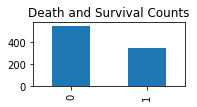

In [ ]:
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts')

**Plotting Pclass counts**

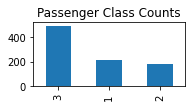

In [ ]:
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')

**Plotting Sex counts**

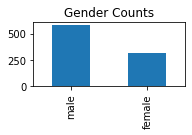

In [ ]:
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', title='Gender Counts')

**Plotting Embarked counts**

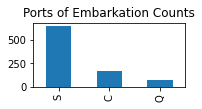

In [ ]:
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', title='Ports of Embarkation Counts')


**Plot the Age histogram**

Text(0.5, 1.0, 'Age Histogram')

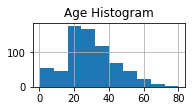

In [13]:
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

**Generating a cross tab of Pclass and Survived:**

In [14]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


**Plotting the cross tab of Pclass and Survived:**

Text(0, 0.5, 'Survival Rate')

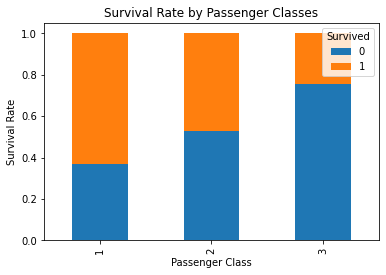

In [15]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

**Plotting a normalized cross tab for Sex_Val and Survived:**

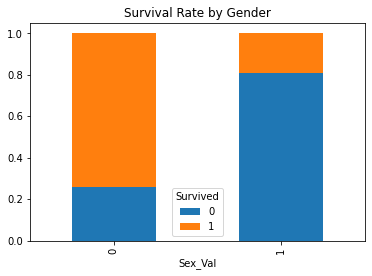

In [16]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

**Counting males and females in each Pclass:**

In [17]:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & (df_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


**Conclusions**

**Age, Cabin, and Embarked are missing values. Cabin has too many missing values**

**There are more deaths than survival**

**Passengers of age 20-40 are most**

**Most Number of survivals are from 3rd class**

**We can see that passenger class seems to have a significant impact on whether a passenger survived. Those in First Class the highest chance for survival.**

**The majority of females survived, whereas the majority of males did not**

**There are more of male passengers in every class**







